### Grip @The Sparks Foundation

### Coder : Deepali Aggarwal(Data Science and Business Analytics Intern)

### Task4 : Exploratory Data Analysis - Terrorism 

(Level - Intermediate)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
dataset = pd.read_csv('globalterrorism.csv', encoding = 'latin1')

In [3]:
dataset.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
dataset.shape

(181691, 135)

### Attacks happening every year and rate of success

<AxesSubplot:xlabel='iyear', ylabel='count'>

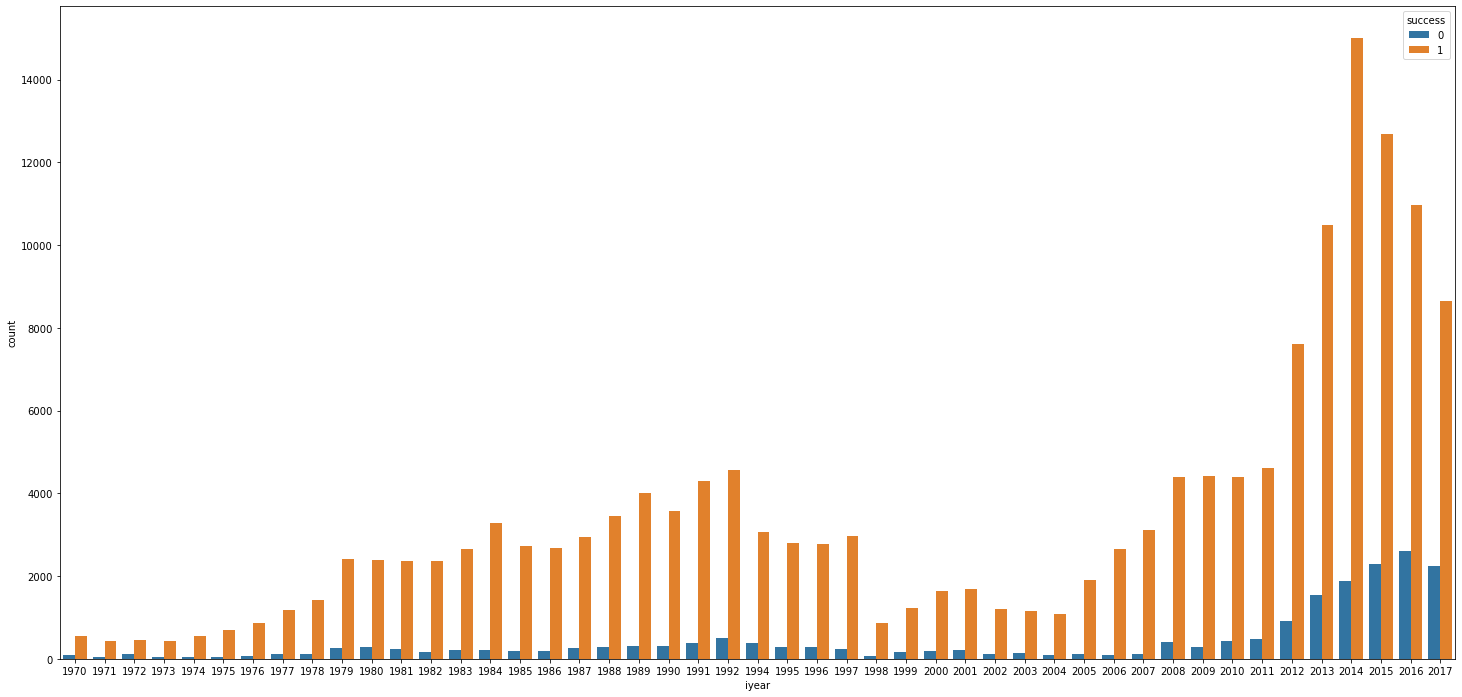

In [5]:
fig, ax = plt.subplots(figsize=(25,12))
sns.countplot(dataset['iyear'], hue = dataset['success'])

<AxesSubplot:xlabel='success', ylabel='count'>

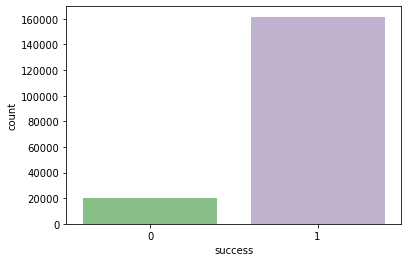

In [6]:
sns.countplot(dataset['success'],palette = 'Accent' )

### Countries with maximum terrorist attacks 

<AxesSubplot:xlabel='country_txt', ylabel='count'>

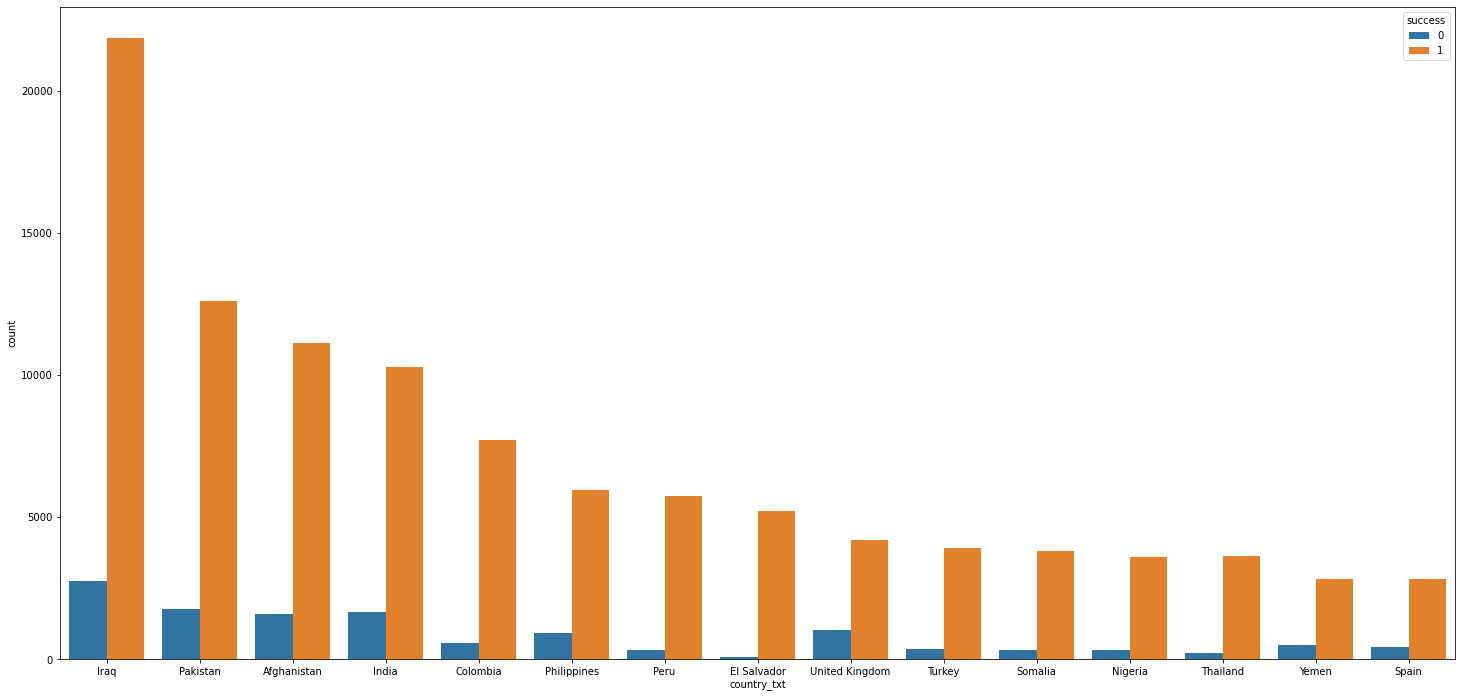

In [7]:
fig, ax = plt.subplots(figsize=(25,12))
sns.countplot(dataset['country_txt'], hue = dataset['success'], 
              order=dataset.country_txt.value_counts().iloc[:15].index)

In [8]:
dataset.replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 
           "Vehicle", 
           inplace=True)

### Type of attacks 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Assassination'),
  Text(1, 0, 'Hostage Taking (Kidnapping)'),
  Text(2, 0, 'Bombing/Explosion'),
  Text(3, 0, 'Facility/Infrastructure Attack'),
  Text(4, 0, 'Armed Assault'),
  Text(5, 0, 'Hijacking'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Unarmed Assault'),
  Text(8, 0, 'Hostage Taking (Barricade Incident)')])

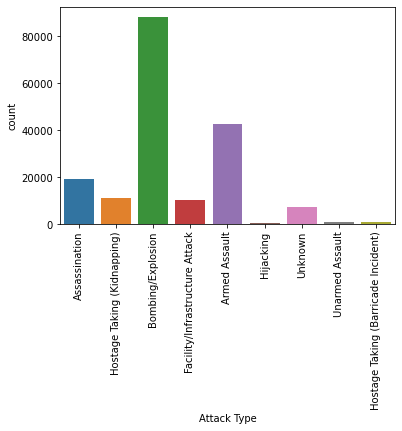

In [9]:
sns.countplot(dataset['attacktype1_txt'])
plt.xlabel('Attack Type')
plt.xticks(rotation = 90)

#### Type of attacks in different countries

Text(0.5, 1.0, 'Type of attacks in countries')

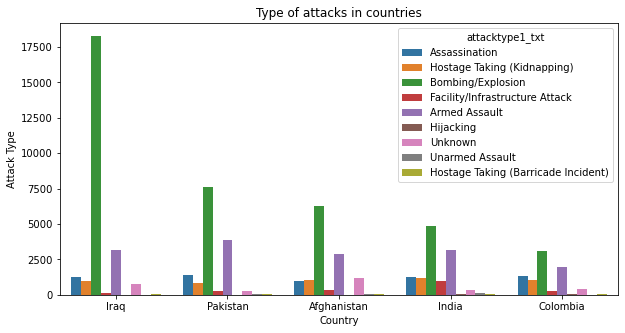

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(dataset['country_txt'], hue=dataset['attacktype1_txt'], 
              order=dataset.country_txt.value_counts().iloc[:5].index)
plt.xlabel('Country')
plt.ylabel('Attack Type')
plt.title("Type of attacks in countries")

### Target of maximum attacks 

Text(0.5, 0, 'Target Type')

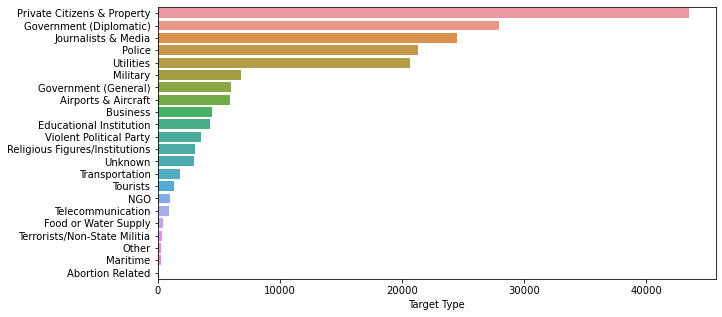

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y = dataset['targtype1_txt'].unique(), x = dataset['targtype1_txt'].value_counts())
plt.xlabel('Target Type')

Text(0.5, 0, 'Country')

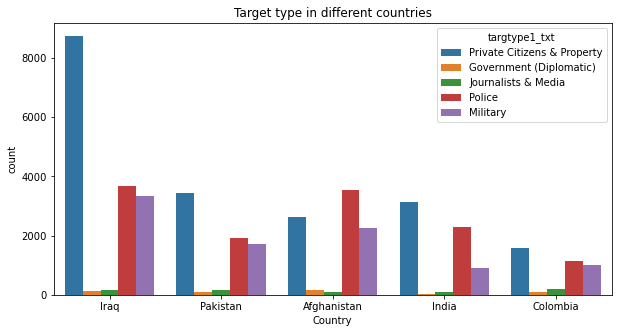

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(dataset['country_txt'], hue=dataset['targtype1_txt'], 
              hue_order = ['Private Citizens & Property', "Government (Diplomatic)",
                           "Journalists & Media", 'Police', 'Military'],
              order=dataset.country_txt.value_counts().iloc[:5].index)
plt.title("Target type in different countries")
plt.xlabel('Country')

#### Terrorist groups involved in these activities

Text(0.5, 1.0, 'Terrorist groups involved in maximum no of attacks')

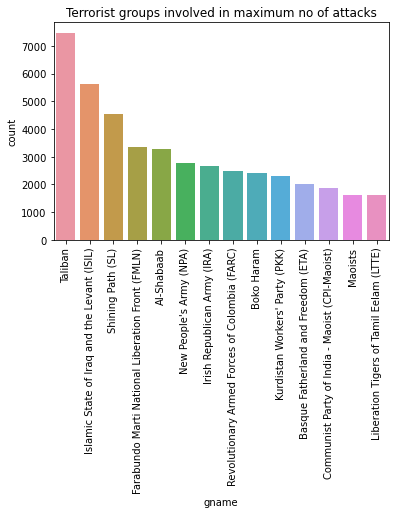

In [13]:
sns.countplot(dataset['gname'] ,order=dataset.gname.value_counts().iloc[1:15].index)
plt.xticks(rotation = 90)
plt.title("Terrorist groups involved in maximum no of attacks")

### Mode of Claim of responsibility used by Prepetrators group

Text(0.5, 0, 'Mode of Claim of Responsibility')

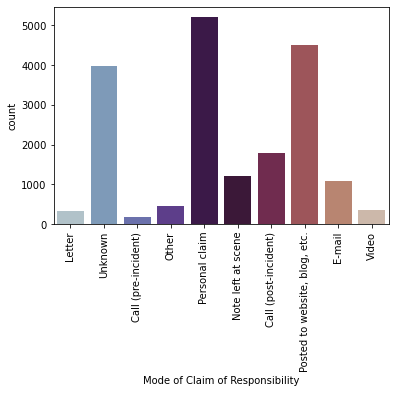

In [14]:
sns.countplot(dataset['claimmode_txt'], palette = 'twilight' )
plt.xticks(rotation = 90)
plt.xlabel("Mode of Claim of Responsibility")

#### Nationality of Perpetrators and location of Attack

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'El Salvador'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Somalia'),
  Text(11, 0, 'Nigeria'),
  Text(12, 0, 'Thailand'),
  Text(13, 0, 'Yemen'),
  Text(14, 0, 'Spain')])

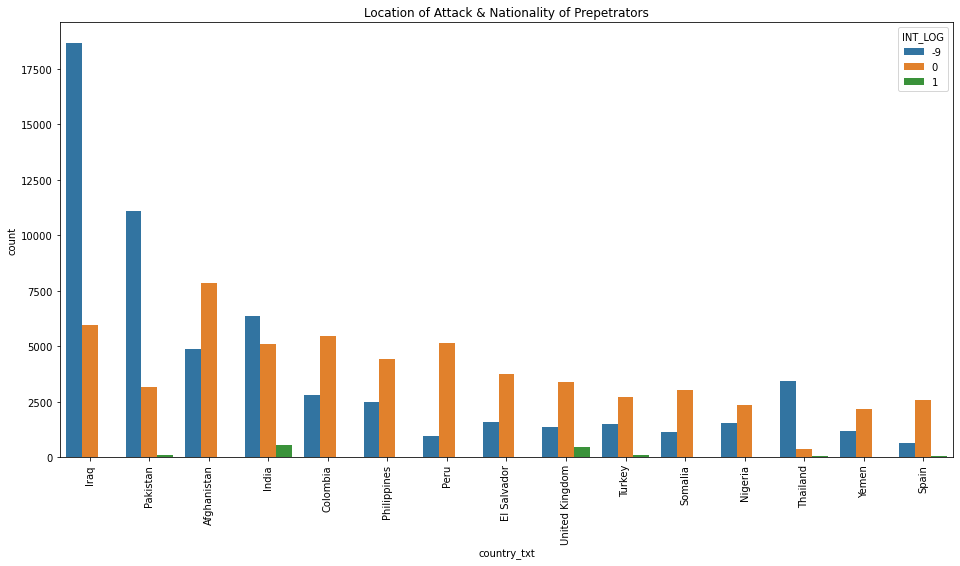

In [15]:
fig, axes = plt.subplots(figsize = (16,8))
sns.countplot(dataset['country_txt'], hue = dataset['INT_LOG'],  
              order=dataset.country_txt.value_counts().iloc[:15].index)
plt.title('Location of Attack & Nationality of Prepetrators')
plt.xticks(rotation = 90)

#### Monetary Ransom demanded

<AxesSubplot:xlabel='ransom', ylabel='count'>

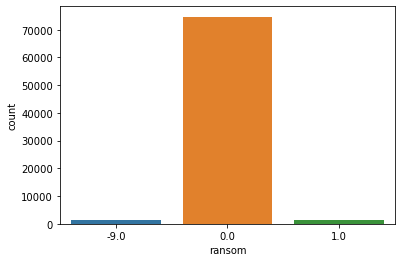

In [16]:
sns.countplot(dataset['ransom'])

#### No of people Killed v/s Injured per year

Text(0, 0.5, 'Killed')

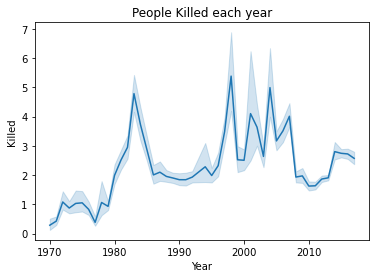

In [17]:
sns.lineplot(dataset['iyear'], dataset['nkill'])
plt.title('People Killed each year' )
plt.xlabel("Year")
plt.ylabel("Killed")

Text(0, 0.5, 'Injured')

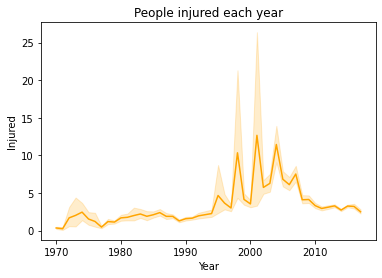

In [18]:
sns.lineplot(dataset['iyear'], dataset['nwound'], color = 'orange')
plt.title('People injured each year' )
plt.xlabel("Year")
plt.ylabel("Injured")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Minor (likely < $1 million)'),
  Text(1, 0, 'Major (likely >= $1 million but < $1 billion)'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Catastrophic (likely >= $1 billion)')])

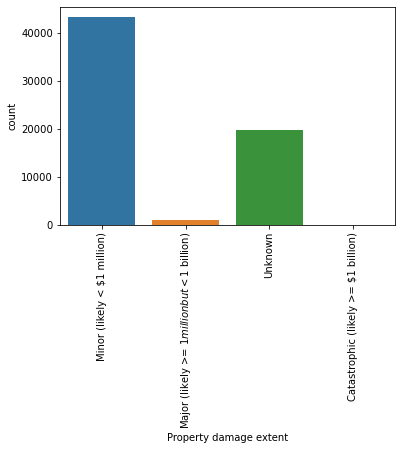

In [19]:
sns.countplot(dataset['propextent_txt'])
plt.xlabel("Property damage extent")
plt.xticks(rotation = 90)

#### No of Perpetrators Captured who committed suicide

<AxesSubplot:xlabel='suicide', ylabel='count'>

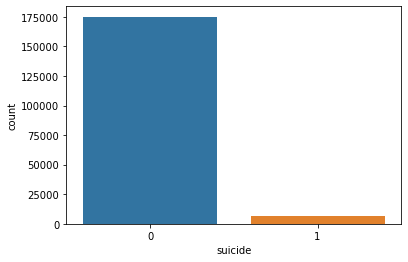

In [20]:
sns.countplot(dataset['suicide'])

* Most of times prepetrators don't commit suicide. They either get arrested or they escape.

### Conclusions

These are some of conclusions drawn after the exploratory data analysis of the datasets

* After analysing the datasets it has been observed that terrorist attacks have increased
significantly from 1970 to 2016 and their success rate is also high which is not good thing.

* Out of many countries Iraq, Afghanistan and Pakistan are the major countries attacked by terrorists
and most of these attacks have their targets private citizens and property, police and military. These countries need to improve their security systems. 

* Most frequent type of attacks are Bombing/explosion or armed assault which has also been observed 
the above countries and the mode of claim of responsiblity of prepetrators is personal claim or they post on social media websites . 

* Taliban, Islamic state of Iraq and levant(ISIL), Shining Path(SL) are the prepetrators groups who 
are actively involved in these activities

* People who get killed or injured during these terrorist attacks have increased over the years 
whereas property damage is most of times minor.  